## Feature Engineering

- All models assume that we have numerical data in a tidy format.(n_samples, n_features) 
- Feature engineering means taking whatever information we have about our problem and turning it into numbers 
  that we can use to build feature matrix

### Categorical features

In [1]:
data = [
    
        {'price': 8500000 , 'rooms': 4, 'location': 'Delhi'},
        {'price': 7000000 , 'rooms': 3, 'location': 'Mumbai'},
        {'price': 6500000 , 'rooms': 3, 'location': 'Chennai'},
        {'price': 6000000 , 'rooms': 2, 'location': 'Delhi'}
]

In [2]:
# Naive approach

{'Delhi': 1, 'Mumbai': 2, 'Chennai': 3};

In [3]:
# In Scikir-Learn, the model will assume the numerical features reflect algerbraic quantities.

# Delhi < Mumbai < Chennai
# Chennai - Mumbai = Delhi, which does not make sense

### One-hot encoding

- Create extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively

In [4]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)

vec.fit_transform(data)

array([[      0,       1,       0, 8500000,       4],
       [      0,       0,       1, 7000000,       3],
       [      1,       0,       0, 6500000,       3],
       [      0,       1,       0, 6000000,       2]])

In [5]:
vec.get_feature_names()

['location=Chennai', 'location=Delhi', 'location=Mumbai', 'price', 'rooms']

- If our category has many possible values, this can increase the size of the dataset.
- However, beacause the encoded data contains mostly zeros, a sparse output can be an efficient solution

In [6]:
# sparse matrix - most of the elements are zero
vec = DictVectorizer(sparse=True, dtype=int)

vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

### Dummy Encoding

## Imputation of Missing Data

In [7]:
import numpy as np

X = np.array([[np.nan, 0, 3],
              [3,7,9],
              [3,5,2],
              [4,np.nan,6],
              [8,8,1]])

y = np.array([14, 16 ,-1, 8, -5])

In [8]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')

X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [9]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression().fit(X2, y)
lin_model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

In [10]:
y

array([14, 16, -1,  8, -5])

## Polynomial Regression

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('City_Population.csv')
dataset

,City,Rank,Population
0,Leh,1,45000
1,Alwar,2,50000
2,Jaipur,3,60000
3,Chandigarh,4,80000
4,Gurugram,5,110000
5,Vizag,6,150000
6,Hyderabad,7,200000
7,Goa,8,300000
8,Mumbai,9,500000
9,Delhi,10,1000000


In [12]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [13]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

- y = a1x + a0 #simple linear regression
- y = a0 + a1x1 + a2x2 + a3x3 + ...#multiple linear regression

y = $a_{0}$ + $a_{1}$$x_{1}$ + $a_{2}$$x_{1}^{2}$ + $a_{3}$$x_{1}^{3}$

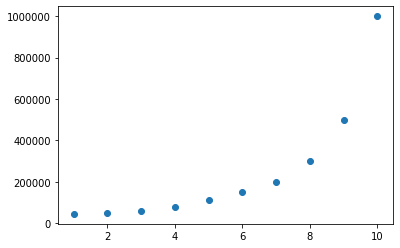

In [14]:
plt.scatter(X, y);

In [15]:
lin_model = LinearRegression()

lin_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

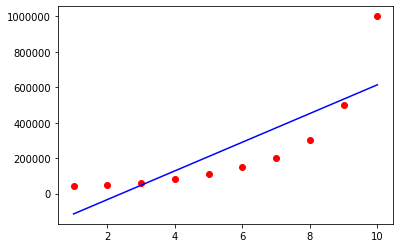

In [16]:
plt.scatter(X, y, color = 'red');
plt.plot(X, lin_model.predict(X), color='blue');

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree= 4)
X_poly = poly_reg.fit_transform(X)

In [39]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [40]:
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

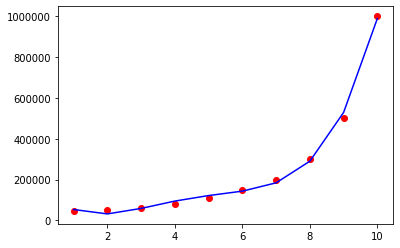

In [41]:
plt.scatter(X, y, color = 'red');
plt.plot(X, poly_model.predict(X_poly), color='blue');

In [42]:
#Evaluate the Model Performance

lin_pred = lin_model.predict(X)

In [46]:
poly_pred = poly_model.predict(X_poly)

In [47]:
from sklearn.metrics import r2_score

r2_score(y, lin_pred)

0.6690412331929895

In [48]:
r2_score(y, poly_pred)

0.9973922891706614

### Regression Example

In [49]:
# Importing the dataset

dataset = pd.read_csv('heart_failure.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [50]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [55]:
X = dataset.drop(['age'], axis = 1).values
y = dataset.iloc[:,0].values

In [57]:
## Splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 0)

In [62]:
y_test.shape

(60,)

In [63]:
# Training the Multiple Linear Regression on the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred = regressor.predict(X_test)

In [65]:
y_pred

array([59.23082405, 58.32088991, 67.23441197, 54.1997762 , 57.95913961,
       61.70252248, 62.06375783, 56.63669354, 77.52387736, 58.35674315,
       53.89169609, 72.09048744, 63.86631089, 61.39297446, 67.23758496,
       61.80762847, 55.45115777, 58.07823692, 60.95473664, 56.5626984 ,
       57.36292827, 56.61946292, 71.21307948, 64.10608035, 62.59392021,
       61.49494632, 64.65569471, 57.3591718 , 58.19753372, 55.2227925 ,
       62.45313946, 60.03397423, 70.71477688, 56.1879212 , 87.4535491 ,
       68.99424927, 59.72876255, 60.0831517 , 58.51231481, 70.53277443,
       60.63228662, 61.60342512, 61.69776229, 68.35983929, 65.47704864,
       59.02936619, 60.20754158, 66.23738465, 66.61285516, 64.35689911,
       60.94761646, 59.85785339, 57.83663848, 61.58706017, 61.42706598,
       63.48843937, 55.85239315, 67.93812814, 57.43133179, 55.98677598])

In [66]:
y_test

array([40.   , 60.667, 45.   , 55.   , 70.   , 65.   , 65.   , 50.   ,
       60.   , 63.   , 70.   , 82.   , 58.   , 55.   , 68.   , 69.   ,
       40.   , 70.   , 55.   , 52.   , 80.   , 42.   , 60.   , 53.   ,
       73.   , 60.   , 45.   , 55.   , 62.   , 53.   , 42.   , 42.   ,
       65.   , 60.   , 54.   , 72.   , 69.   , 65.   , 50.   , 90.   ,
       68.   , 57.   , 67.   , 65.   , 95.   , 50.   , 53.   , 45.   ,
       60.   , 50.   , 65.   , 60.   , 50.   , 55.   , 72.   , 60.   ,
       65.   , 95.   , 65.   , 50.   ])

In [67]:
y_pred - y_test # mean absolute error

array([ 19.23082405,  -2.34611009,  22.23441197,  -0.8002238 ,
       -12.04086039,  -3.29747752,  -2.93624217,   6.63669354,
        17.52387736,  -4.64325685, -16.10830391,  -9.90951256,
         5.86631089,   6.39297446,  -0.76241504,  -7.19237153,
        15.45115777, -11.92176308,   5.95473664,   4.5626984 ,
       -22.63707173,  14.61946292,  11.21307948,  11.10608035,
       -10.40607979,   1.49494632,  19.65569471,   2.3591718 ,
        -3.80246628,   2.2227925 ,  20.45313946,  18.03397423,
         5.71477688,  -3.8120788 ,  33.4535491 ,  -3.00575073,
        -9.27123745,  -4.9168483 ,   8.51231481, -19.46722557,
        -7.36771338,   4.60342512,  -5.30223771,   3.35983929,
       -29.52295136,   9.02936619,   7.20754158,  21.23738465,
         6.61285516,  14.35689911,  -4.05238354,  -0.14214661,
         7.83663848,   6.58706017, -10.57293402,   3.48843937,
        -9.14760685, -27.06187186,  -7.56866821,   5.98677598])

In [ ]:
# mean squared errors (penalizes higher error)
# root mean squared error (same unit)

In [68]:
r2_score(y_test, y_pred)

-0.03615893822179861

In [69]:
#Multi-collinearity in Regression

import statsmodels.api as sm

results = sm.OLS(y, X).fit() #Ordinary least squares
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              703.2
Date:                Sat, 23 Jan 2021   Prob (F-statistic):                   7.66e-205
Time:                        22:02:05   Log-Likelihood:                         -1147.7
No. Observations:                 299   AIC:                                      2319.
Df Residuals:                     287   BIC:                                      2364.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree= 4)
X_poly = poly_reg.fit_transform(X_train)

In [72]:
X_poly.shape

(239, 1820)

In [74]:
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
y_pred = regressor.predict(poly_reg.transform(X_test))

In [77]:
r2_score(y_test, y_pred)

-1009.6467198264306